##1.1
#Load & Inspect



In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
df=pd.read_csv('/content/car_prices.csv')

In [53]:
print (df.head(5))

   year   make                model        trim   body transmission  \
0  2015    Kia              Sorento          LX    SUV    automatic   
1  2015    Kia              Sorento          LX    SUV    automatic   
2  2014    BMW             3 Series  328i SULEV  Sedan    automatic   
3  2015  Volvo                  S60          T5  Sedan    automatic   
4  2014    BMW  6 Series Gran Coupe        650i  Sedan    automatic   

                 vin state  condition  odometer  color interior  \
0  5xyktca69fg566472    ca        5.0   16639.0  white    black   
1  5xyktca69fg561319    ca        5.0    9393.0  white    beige   
2  wba3c1c51ek116351    ca       45.0    1331.0   gray    black   
3  yv1612tb4f1310987    ca       41.0   14282.0  white    black   
4  wba6b2c57ed129731    ca       43.0    2641.0   gray    black   

                                   seller      mmr  sellingprice  \
0                 kia motors america  inc  20500.0       21500.0   
1                 kia motors ameri

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


##1.2
#Understanding the Data Structure

In [55]:
print(df.shape)

(558837, 16)


In [56]:
print(df.dtypes)

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
saledate         object
dtype: object


##1.3
#Missing & Anomaly Detection

In [57]:
null_counts=df.isnull().sum()
print("Null Counts Per Column")
print(null_counts)

Null Counts Per Column
year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64


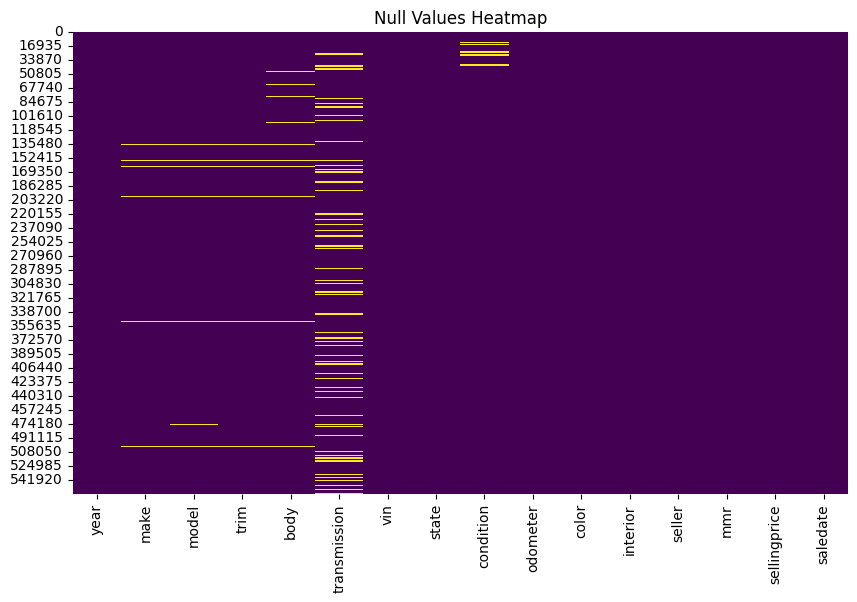

In [58]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')
plt.title('Null Values Heatmap')
plt.show()


In [59]:
df['condition']=df['condition'].fillna(df['condition'].mean())
df['odometer']=df['odometer'].fillna(df['odometer'].mean())



In [60]:
columns_to_fill = ['body','transmission','make','model','trim','color','interior']
for column in columns_to_fill:
  mode_value= df[column].mode()[0]
  df[column].fillna(df[column].mode()[0],inplace=True)

/tmp/ipython-input-1353286174.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0],inplace=True)


In [61]:
num_duplicates = df.duplicated().sum()

print(f"Number of duplicate records: {num_duplicates}")

Number of duplicate records: 0


## 2.1
#Calculate the average, minimum, and maximum car price?


In [63]:
min_price=df['sellingprice'].min()
max_price=df['sellingprice'].max()
avg_price=df['sellingprice'].mean()

print(f"Minimum Car Price: {min_price}$")
print(f"Maximum Car Price: {max_price}$")
print(f"Average Car Price: {avg_price}$")

Minimum Car Price: 1.0$
Maximum Car Price: 230000.0$
Average Car Price: 13611.358810003132$


##2.2
#List all unique colors of cars

In [64]:
unique_colors=df['color'].unique()
print("Unique Colors:")
print(unique_colors)

Unique Colors:
['white' 'gray' 'black' 'red' 'silver' 'blue' 'brown' 'beige' 'purple'
 'burgundy' '—' 'gold' 'yellow' 'green' 'charcoal' 'orange' 'off-white'
 'turquoise' 'pink' 'lime' '4802' '9410' '1167' '2172' '14872' '12655'
 '15719' '6388' '16633' '11034' '2711' '6864' '339' '18384' '9887' '9837'
 '20379' '20627' '721' '6158' '2817' '5705' '18561' '2846' '9562' '5001']


##2.3
#Find the number of unique car brands and car models

In [31]:
unique_make=df['make'].unique()
print("Unique Make:")
print(unique_make)
unique_model=df['model'].unique()
print("Unique Model:")
print(unique_model)

Unique Make:
['Kia' 'BMW' 'Volvo' 'Nissan' 'Chevrolet' 'Audi' 'Ford' 'Hyundai' 'Buick'
 'Cadillac' 'Acura' 'Lexus' 'Infiniti' 'Jeep' 'Mercedes-Benz' 'Mitsubishi'
 'Mazda' 'MINI' 'Land Rover' 'Lincoln' 'lincoln' 'Jaguar' 'Volkswagen'
 'Toyota' 'Subaru' 'Scion' 'Porsche' 'bmw' 'Dodge' 'FIAT' 'Chrysler'
 'ford' 'Ferrari' 'Honda' 'GMC' 'mitsubishi' 'Ram' 'smart' 'chevrolet'
 'Bentley' 'chrysler' 'pontiac' 'Pontiac' 'Saturn' 'Maserati' 'Mercury'
 'HUMMER' 'landrover' 'cadillac' 'land rover' 'mercedes' 'mazda' 'toyota'
 'lexus' 'gmc truck' 'honda' 'nissan' 'porsche' 'Saab' 'Suzuki' 'dodge'
 'subaru' 'Oldsmobile' 'oldsmobile' 'hyundai' 'jeep' 'Isuzu' 'dodge tk'
 'Geo' 'acura' 'volkswagen' 'suzuki' 'kia' 'audi' 'Rolls-Royce' 'gmc'
 'maserati' 'mazda tk' 'mercury' 'buick' 'hyundai tk' 'mercedes-b' 'vw'
 'Daewoo' 'chev truck' 'ford tk' 'plymouth' 'Plymouth' 'ford truck'
 'Tesla' 'airstream' 'dot' 'Aston Martin' 'Fisker']
Unique Model:
['Sorento' '3 Series' 'S60' '6 Series Gran Coupe' 'Altima' 'M

##2.4
# Find all car information having selling prices greater than $165000

In [32]:
filtered_cars=df['sellingprice']>165000
expensive_cars=df[filtered_cars]
print(expensive_cars)

        year         make  model  trim   body transmission                vin  \
125095  2012  Rolls-Royce  Ghost  Base  Sedan    automatic  sca664s58cux50727   

       state  condition  odometer  color interior            seller       mmr  \
125095    fl       45.0   14316.0  black    beige  braman motorcars  154000.0   

        sellingprice                                 saledate  
125095      169500.0  Wed Jan 14 2015 01:40:00 GMT-0800 (PST)  


##2.5
#Find the top 5 most frequently sold car models

In [34]:
top_5_models=df['model'].value_counts().head(5)
print(top_5_models)

model
Altima    4859
F-150     2841
Camry     2659
Accord    2538
Escape    2468
Name: count, dtype: int64


##2.6
#What is the average selling price of cars by brand (make)

In [35]:
avg_price_by_make = (
    df.groupby('make')['sellingprice']
    .mean()
    .sort_values(ascending=False)
)

print(avg_price_by_make)

make
Rolls-Royce    159650.000000
Ferrari        137750.000000
Tesla           80000.000000
airstream       71000.000000
Bentley         67445.833333
                   ...      
dodge tk          550.000000
dot               500.000000
ford truck        483.333333
Geo               395.000000
Daewoo            300.000000
Name: sellingprice, Length: 94, dtype: float64


##2.7
#What is the minimum selling price of cars for each interior

In [36]:
min_price_by_interior=df.groupby('interior')['sellingprice'].min()
print(min_price_by_interior)

interior
beige         100.0
black           1.0
blue          200.0
brown         275.0
burgundy      400.0
gold          300.0
gray            1.0
green         300.0
off-white     900.0
orange       3100.0
purple        200.0
red           200.0
silver        500.0
tan           150.0
white         400.0
yellow       4100.0
—             175.0
Name: sellingprice, dtype: float64


##2.8
#Find highest odometer reading per year from highest to lowest order

In [37]:
highest_odometer_per_year = (
    df.groupby('year')['odometer']
      .max()
      .sort_values(ascending=False)
)

print(highest_odometer_per_year)

year
2008    999999.0
2009    999999.0
2010    999999.0
2012    999999.0
2004    999999.0
2005    999999.0
2013    999999.0
2014    999999.0
2006    999999.0
2003    999999.0
2002    470368.0
2011    436372.0
2007    428472.0
1997    423691.0
2001    411780.0
1995    396793.0
2000    379439.0
1992    379069.0
1993    378670.0
1999    374598.0
1996    366622.0
1998    351917.0
1994    312693.0
1991    274149.0
1990    247555.0
1987    195154.0
1989    185704.0
1984    122136.0
1988    100459.0
1985     95965.0
1986     72250.0
2015     44174.0
Name: odometer, dtype: float64


##2.9
#Create a new column for car age

In [39]:
CURRENT_YEAR = 2025
df['car_age'] = CURRENT_YEAR - df['year']

df[['year', 'car_age']]

,year,car_age
0,2015,10
1,2015,10
2,2014,11
3,2015,10
4,2014,11
...,...,...
126265,2011,14
126266,2011,14
126267,2011,14
126268,2011,14


##2.10
#Find the number of cars having a condition greater than or equal to 48 and odometer greater than 90000

In [40]:
filtered_count = df[
    (df['condition'] >= 48) &
    (df['odometer'] > 90000)
].shape[0]

print(f"Number of cars meeting the criteria: {filtered_count}")

Number of cars meeting the criteria: 135


##2.11
# Which state consistently has higher car prices for newer cars(year>2013)

In [43]:
newer_cars = df[df['year'] > 2013]
avg_price_by_state = (
    newer_cars
    .groupby('state')['sellingprice']
    .mean()
    .sort_values(ascending=False)
)

avg_price_by_state
top_state = avg_price_by_state.idxmax()
top_price = avg_price_by_state.max()

print(f"State with highest average price for newer cars: {top_state}")
print(f"Average price: {top_price}")

State with highest average price for newer cars: ms
Average price: 31700.0


##2.12
#For cars with excellent condition (top 20%), which makes have the lowest average price (value for money)

In [50]:
condition_threshold = df['condition'].quantile(0.80)

condition_threshold
excellent_cars = df[df['condition'] >= condition_threshold]
value_for_money_df = (
    excellent_cars
    .groupby('make', as_index=False)['sellingprice']
    .mean()
    .sort_values(by='sellingprice')
)

value_for_money_df.rename(
    columns={'price': 'Average Price (Excellent Condition)'},
    inplace=True
)

value_for_money_df

,make,sellingprice
54,honda,4233.333333
32,Oldsmobile,4400.000000
38,Saturn,5617.142857
49,chrysler,6033.333333
69,subaru,6200.000000
...,...,...
12,Fisker,54500.000000
26,Maserati,67083.333333
4,Bentley,75055.555556
11,Ferrari,144666.666667


##3.1
#Show the correlation of all the features(columns) having numerical values

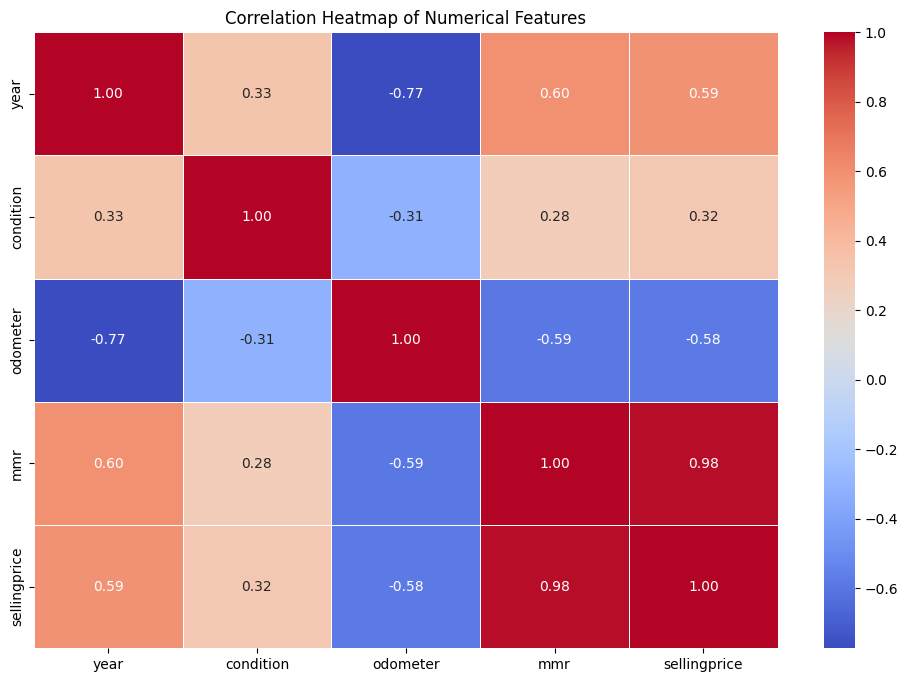

In [65]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

numeric_df.columns
correlation_matrix = numeric_df.corr()
correlation_matrix
plt.figure(figsize=(12, 8))

sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5
)

plt.title('Correlation Heatmap of Numerical Features')
plt.show()

##3.2
#Plot a graph to show the average selling price by year and explain the pattern you notice from the graph.

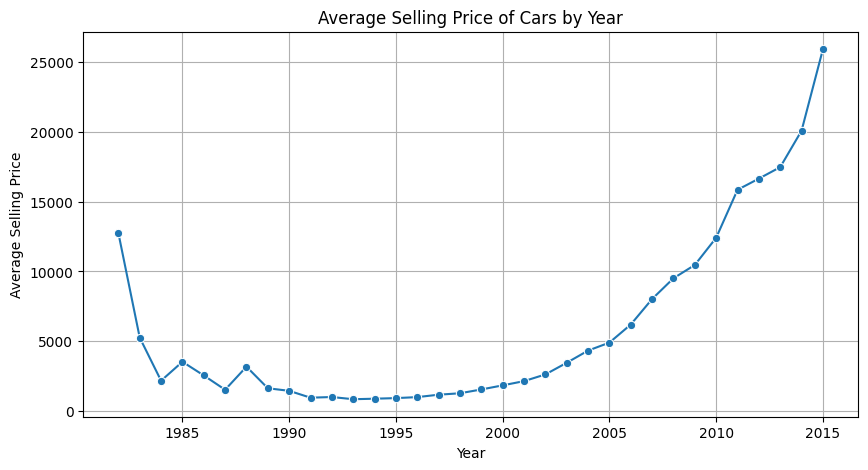

In [68]:
avg_price_by_year = (
    df.dropna(subset=['year', 'sellingprice'])
      .groupby('year', as_index=False)['sellingprice']
      .mean()
      .sort_values('year')
)
plt.figure(figsize=(10, 5))

sns.lineplot(
    data=avg_price_by_year,
    x='year',
    y='sellingprice',
    marker='o'
)

plt.title('Average Selling Price of Cars by Year')
plt.xlabel('Year')
plt.ylabel('Average Selling Price')
plt.grid(True)

plt.show()

We can see a drop in the average selling price from the year 1980 to 2000 after which the average selling price has seen a significant rise. The highest being in 2015 with an avg selling price of $25000.

##3.3
#Plot a graph to show average selling price by odometer and explain the trend you notice from the graph

/tmp/ipython-input-242107584.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('odometer_bin', as_index=False)['sellingprice']


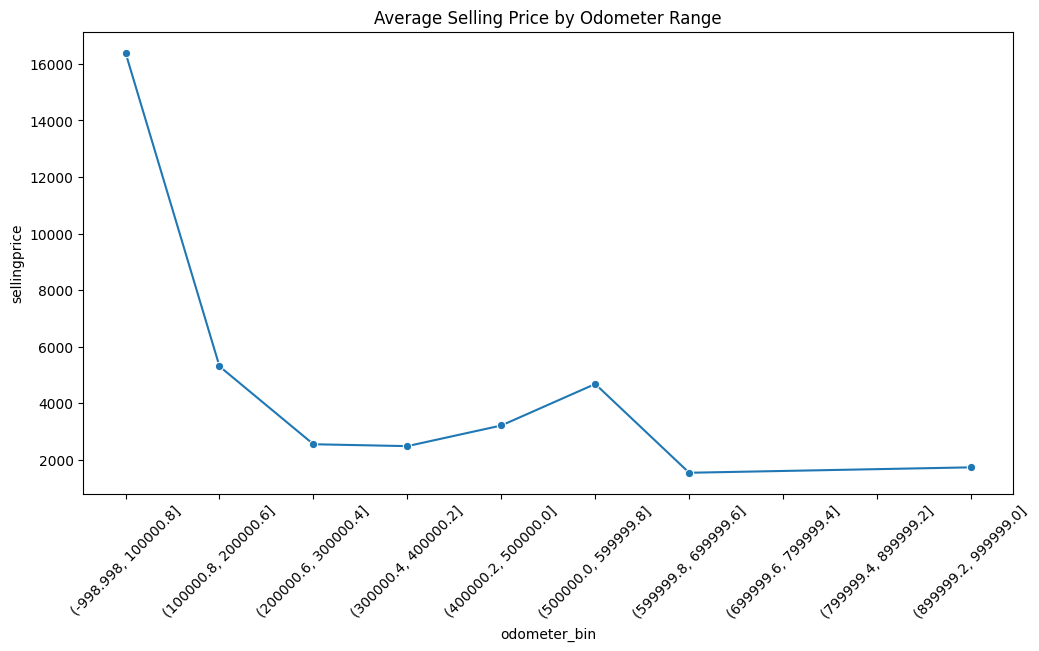

In [75]:
df_clean = df.dropna(subset=['odometer', 'sellingprice']).copy()

df_clean['odometer_bin'] = pd.cut(
    df_clean['odometer'],
    bins=10
)
avg_price_by_odometer = (
    df_clean
    .groupby('odometer_bin', as_index=False)['sellingprice']
    .mean()
)

avg_price_by_odometer['odometer_bin'] = avg_price_by_odometer['odometer_bin'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=avg_price_by_odometer,
    x='odometer_bin',
    y='sellingprice',
    marker='o'
)
plt.xticks(rotation=45)
plt.title('Average Selling Price by Odometer Range')
plt.show()

We can see that higher the odometer reading the lower the selling price of the car.

##3.4
#Plot a graph to show the number of cars sold in each state. Find the top three highest car selling states by having a look at the graph

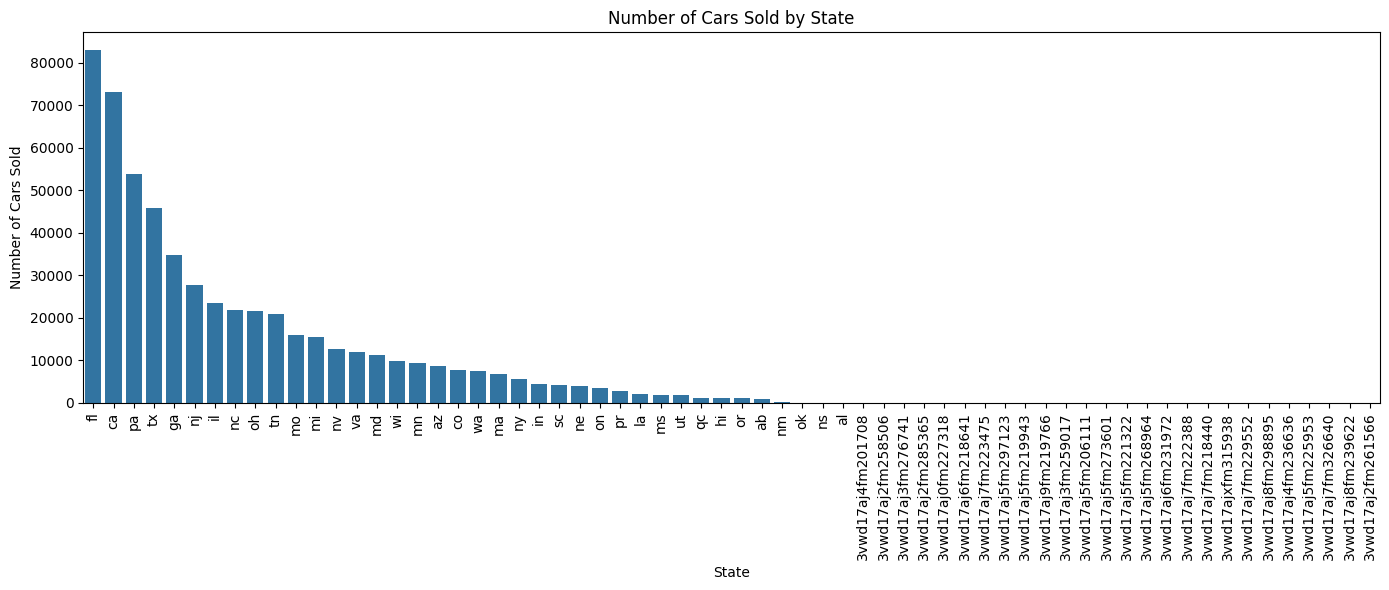

In [76]:
cars_sold_by_state = (
    df['state']
    .value_counts()
    .reset_index()
)

cars_sold_by_state.columns = ['state', 'cars_sold']
cars_sold_by_state.head()
plt.figure(figsize=(14, 6))

sns.barplot(
    data=cars_sold_by_state,
    x='state',
    y='cars_sold'
)

plt.title('Number of Cars Sold by State')
plt.xlabel('State')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The top 3 states with highest car sales are Florida, California and Pennsylvania respectively

##3.5
# Plot a bar graph of average selling price by condition score ranges of size 5. Give a summary of the insights

/tmp/ipython-input-1883433550.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('condition_bin', as_index=False)['sellingprice']


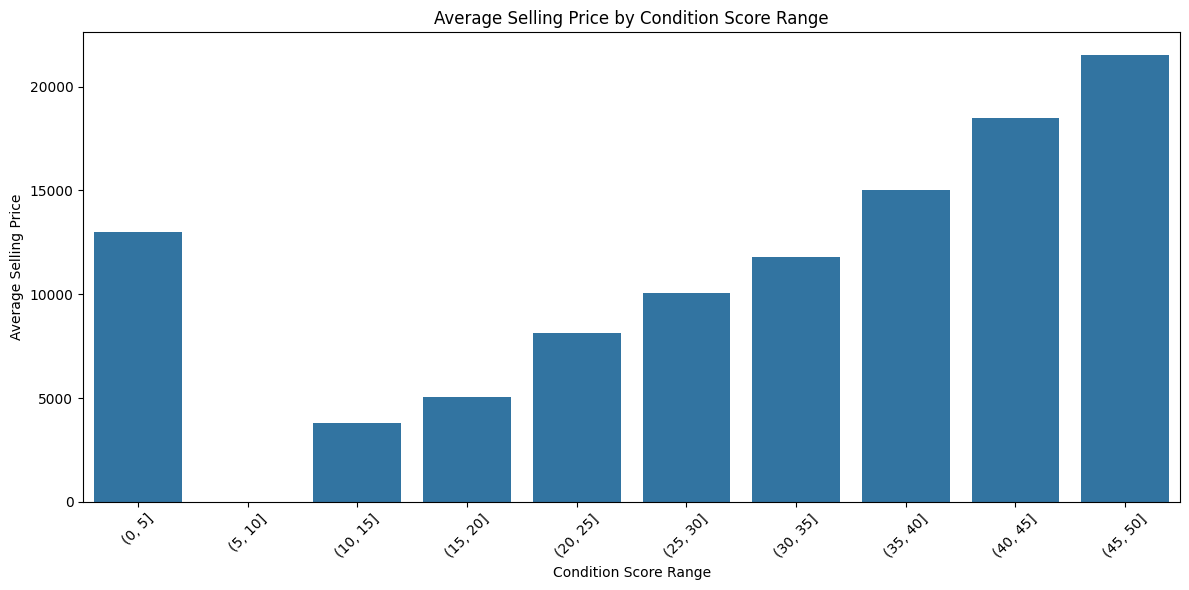

In [78]:
df_clean = df.dropna(subset=['condition', 'sellingprice']).copy()
df_clean['condition_bin'] = pd.cut(
    df_clean['condition'],
    bins=range(0, int(df_clean['condition'].max()) + 6, 5)
)
avg_price_by_condition = (
    df_clean
    .groupby('condition_bin', as_index=False)['sellingprice']
    .mean()
)
avg_price_by_condition['condition_bin'] = avg_price_by_condition['condition_bin'].astype(str)
plt.figure(figsize=(12, 6))

sns.barplot(
    data=avg_price_by_condition,
    x='condition_bin',
    y='sellingprice'
)

plt.title('Average Selling Price by Condition Score Range')
plt.xlabel('Condition Score Range')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

We can see that as the condition of a car improves, the selling price goes up proportionately. Cars in the score range of 5-10 are the least expensive while cars in the score range of 45-50 are highly expensive.

##3.6
#Plot a bar graph of no. of cars sold by condition ranges of size 10. Give some insights from the graph

/tmp/ipython-input-575561215.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('condition_bin')


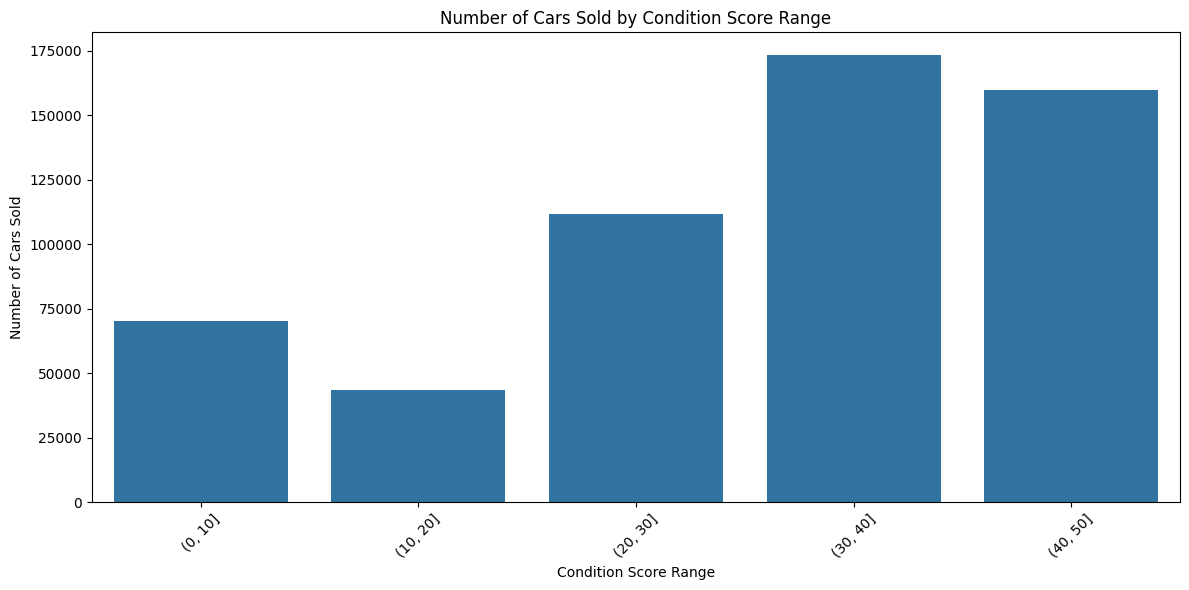

In [79]:
df_clean = df.dropna(subset=['condition']).copy()
df_clean['condition_bin'] = pd.cut(
    df_clean['condition'],
    bins=range(0, int(df_clean['condition'].max()) + 11, 10)
)
cars_by_condition = (
    df_clean
    .groupby('condition_bin')
    .size()
    .reset_index(name='cars_sold')
)
cars_by_condition['condition_bin'] = cars_by_condition['condition_bin'].astype(str)
plt.figure(figsize=(12, 6))

sns.barplot(
    data=cars_by_condition,
    x='condition_bin',
    y='cars_sold'
)

plt.title('Number of Cars Sold by Condition Score Range')
plt.xlabel('Condition Score Range')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

We can see that the condition of the cars affect the mindset of the consumer significantly. Cars in bad shapes are overlooked while cars in good condition are preferred by customers. The best performing are the cars in 30-40 bracket while the least performing are the cars in 10-20 bracket.

##3.7
#Plot a box plot to show the distribution of car selling prices grouped by color. Extract insights and if required, remove outliers and plot the graph again.


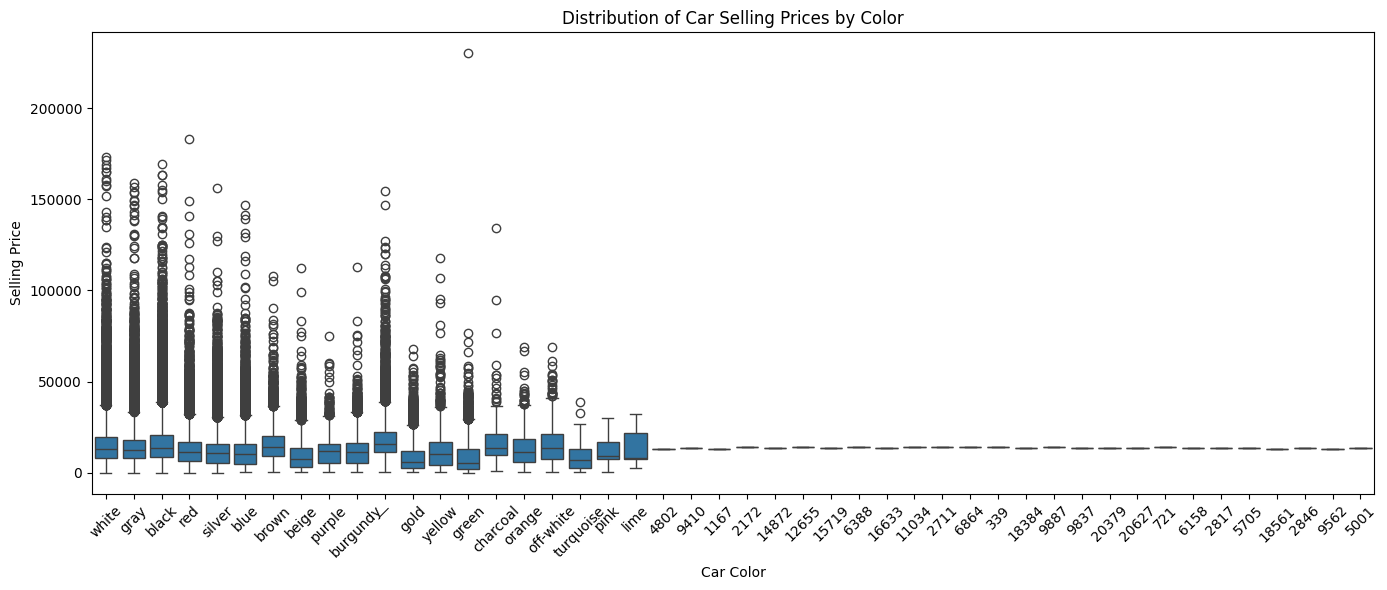

In [81]:
plt.figure(figsize=(14, 6))

sns.boxplot(
    data=df,
    x='color',
    y='sellingprice'
)

plt.title('Distribution of Car Selling Prices by Color')
plt.xlabel('Car Color')
plt.ylabel('Selling Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [84]:
df_clean = df.dropna(subset=['sellingprice', 'color']).copy()
Q1 = df_clean['sellingprice'].quantile(0.25)
Q3 = df_clean['sellingprice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df_clean[(df_clean['sellingprice'] >= lower_bound) &
    (df_clean['sellingprice'] <= upper_bound)
]

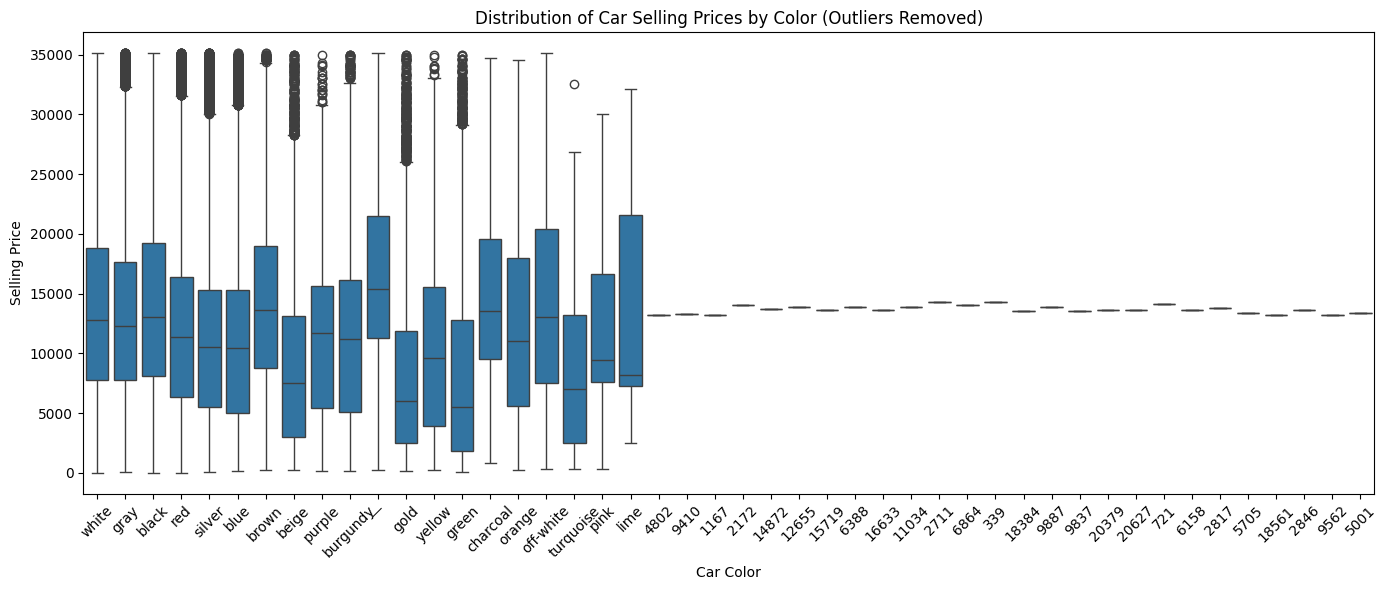

In [85]:
plt.figure(figsize=(14, 6))

sns.boxplot(
    data=df_no_outliers,
    x='color',
    y='sellingprice'
)

plt.title('Distribution of Car Selling Prices by Color (Outliers Removed)')
plt.xlabel('Car Color')
plt.ylabel('Selling Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We can see that Burgundy colored cars have the highest median selling price. The lowest median is with Green and Gold.